# Standard Logistic Selectivity

Two-parameter ascending logistic formulation

## Overview

The standard (ascending) logistic selectivity is the simplest and most commonly used parameterization in age-structured stock assessments. It assumes that selectivity increases monotonically with age and asymptotes at full selectivity.

## Model definition

With parameters $a_{50}$ (age at 50% selectivity) and $\delta$ (slope width from 50% to 95% selectivity):

$$
\text{sel}(a) = \frac{1}{1 + \exp\left[-\log(19)\,\frac{a - a_{50}}{\delta}\right]}
$$

where $\delta > 0$ controls how quickly selectivity transitions from low to high values.

In [ ]:
library(ggplot2)
library(dplyr)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

## Scenario exploration

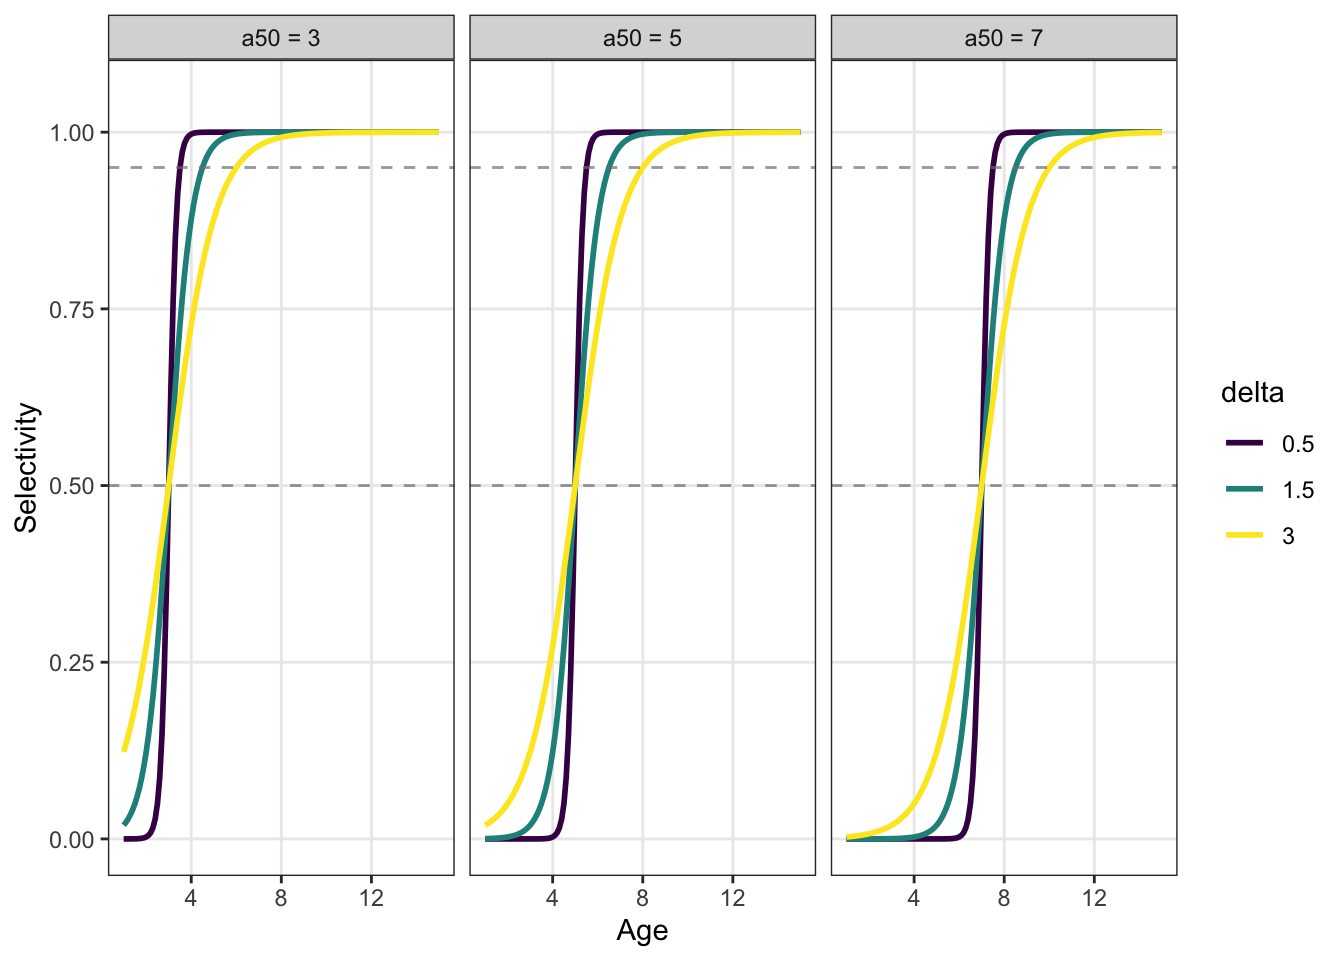

In [ ]:
scenarios <- expand_grid(
  a50 = c(3, 5, 7),
  delta = c(0.5, 1.5, 3.0),
  age = ages
) %>%
  mutate(
    selectivity = logistic_sel(age, a50, delta),
    label = sprintf("a50 = %g, delta = %g", a50, delta)
  )

ggplot(scenarios, aes(x = age, y = selectivity, color = factor(delta))) +
  geom_line(linewidth = 1) +
  facet_wrap(~ paste("a50 =", a50)) +
  geom_hline(yintercept = c(0.5, 0.95), linetype = "dashed",
             color = "gray50", alpha = 0.7) +
  scale_color_viridis_d(name = "delta") +
  scale_y_continuous(limits = c(0, 1.05)) +
  labs(x = "Age", y = "Selectivity") +
  theme_bw(base_size = 11) +
  theme(panel.grid.minor = element_blank())


## RTMB implementation

*Placeholder: RTMB objective function with priors on $a_{50}$ and $\delta$, optimization, and MCMC sampling.*

In [ ]:
library(RTMB)

# Objective function skeleton
f <- function(parms) {
  getAll(data, parms, warn = FALSE)
  a50 <- exp(log_a50)
  delta <- exp(log_delta)
  sel_hat <- logistic_sel(age, a50, delta)

  nll <- 0
  # Priors
  nll <- nll - dnorm(log_a50, mu_log_a50, sd_log_a50, log = TRUE)
  nll <- nll - dnorm(log_delta, mu_log_delta, sd_log_delta, log = TRUE)

  ADREPORT(c(a50 = a50, delta = delta))
  nll
}
